In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib.pyplot as plt
import statsmodels


In [80]:
df = pd.read_csv("final_weighted_data.csv") 
df.dropna(inplace=True)
df.describe()

,emotion_score,emotional_entry_count,average_sentiment_score,sentiment_entry_count,percentage_difference
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,-0.587288,160.303030,0.110505,240.878788,0.074466
std,0.284031,138.065991,0.254808,124.789262,0.566660
min,-0.955752,2.000000,-0.209905,1.000000,-1.325644
25%,-0.861111,48.000000,-0.014135,158.000000,-0.160781
50%,-0.586572,125.000000,0.088435,304.000000,0.060079
75%,-0.429134,250.000000,0.119526,336.000000,0.425471
max,0.000000,627.000000,0.999845,393.000000,1.633034


In [81]:
# Drop rows where emotional_entry_count or sentiment_entry_count is less than 30
df = df[(df["emotional_entry_count"] >= 30) & (df["sentiment_entry_count"] >= 30)]

# Sort dataframe by decreasing emotion_score
df_sorted = df.sort_values(by="emotion_score", ascending=False)

# Print all values
print(df_sorted.to_string(index=False))

    company   segment  emotion_score  emotional_entry_count  average_sentiment_score  sentiment_entry_count  percentage_difference starting_time
crowdstrike output002      -0.016000                  125.0                 0.090546                  242.0               0.021293      14:53:50
crowdstrike output003      -0.134831                   89.0                -0.114994                  267.0               0.336643      15:23:50
  facebook2 output006      -0.222772                  202.0                -0.159362                  202.0              -0.000666      16:03:30
  facebook2 output009      -0.429134                  254.0                 0.071174                  361.0               0.116280      17:33:30
     boeing output001      -0.450980                   51.0                 0.121363                  304.0              -1.325644      10:22:57
  facebook2 output002      -0.532000                  250.0                 0.119526                  317.0              -0.154170

### Predicting Sentiment Analysis Score using Multivariate Regression for Emotions

                               OLS Regression Results                              
Dep. Variable:     average_sentiment_score   R-squared:                       0.007
Model:                                 OLS   Adj. R-squared:                 -0.040
Method:                      Least Squares   F-statistic:                    0.1485
Date:                     Thu, 13 Mar 2025   Prob (F-statistic):              0.704
Time:                             12:38:23   Log-Likelihood:                 18.816
No. Observations:                       23   AIC:                            -33.63
Df Residuals:                           21   BIC:                            -31.36
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

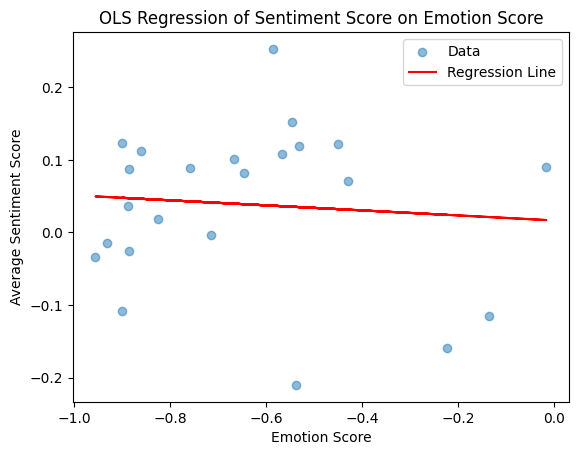

In [82]:
import statsmodels.api as sm

# All emotion columns together (multivariate regression)
X = df["emotion_score"]
X = sm.add_constant(X)
y = df["average_sentiment_score"]

# # Fit the OLS model
model = sm.OLS(y, X)

results = model.fit()

# Print the full regression summary (this is very "econometrics textbook")
print(results.summary())

# Scatter plot of the data
plt.scatter(df["emotion_score"], df["average_sentiment_score"], alpha=0.5, label="Data")

# Plot the regression line
plt.plot(df["emotion_score"], results.predict(X), color="red", label="Regression Line")

# # Add labels for each point
# for i, row in df.iterrows():
#     plt.text(row["emotion_score"], row["average_sentiment_score"], row["company"], fontsize=9, ha="right", va="bottom")

# Labels and title
plt.xlabel("Emotion Score")
plt.ylabel("Average Sentiment Score")
plt.title("OLS Regression of Sentiment Score on Emotion Score")
plt.legend()

# Show the plot
plt.show()


### Predicting Stock Percentage Change using Emotional Analysis

                              OLS Regression Results                             
Dep. Variable:     percentage_difference   R-squared:                       0.061
Model:                               OLS   Adj. R-squared:                  0.016
Method:                    Least Squares   F-statistic:                     1.367
Date:                   Thu, 13 Mar 2025   Prob (F-statistic):              0.255
Time:                           12:38:23   Log-Likelihood:                -14.715
No. Observations:                     23   AIC:                             33.43
Df Residuals:                         21   BIC:                             35.70
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

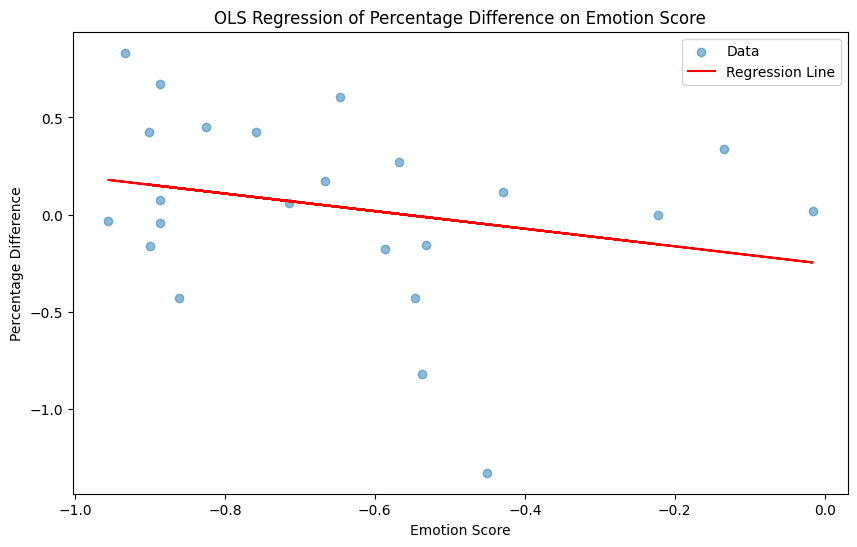

In [83]:
import statsmodels.api as sm

# All emotion columns together (multivariate regression)
X = df["emotion_score"]
X = sm.add_constant(X)
y = df["percentage_difference"]

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the full regression summary (this is very "econometrics textbook")
print(results.summary())

# Scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(df["emotion_score"], df["percentage_difference"], alpha=0.5, label="Data")

# Plot the regression line
plt.plot(df["emotion_score"], results.predict(X), color="red", label="Regression Line")

# # Add labels for each point with company names
# for i, row in df.iterrows():
#     plt.text(row["emotion_score"], row["percentage_difference"], row["company"], fontsize=9, ha="right", va="bottom")

# Labels and title
plt.xlabel("Emotion Score")
plt.ylabel("Percentage Difference")
plt.title("OLS Regression of Percentage Difference on Emotion Score")
plt.legend()

# Show the plot
plt.show()

### Predicting Stock Percentage Change using Sentiment Analysis

                              OLS Regression Results                             
Dep. Variable:     percentage_difference   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.047
Method:                    Least Squares   F-statistic:                   0.02235
Date:                   Thu, 13 Mar 2025   Prob (F-statistic):              0.883
Time:                           12:38:23   Log-Likelihood:                -15.428
No. Observations:                     23   AIC:                             34.86
Df Residuals:                         21   BIC:                             37.13
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

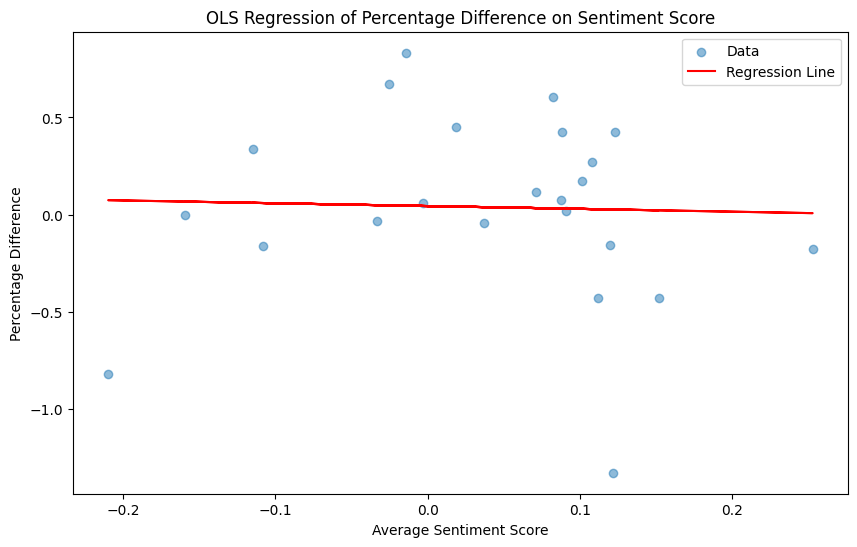

In [84]:
import statsmodels.api as sm

# All emotion columns together (multivariate regression)
X = df["average_sentiment_score"]
X = sm.add_constant(X)
y = df["percentage_difference"]

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the full regression summary (this is very "econometrics textbook")
print(results.summary())

plt.figure(figsize=(10, 6))
plt.scatter(df["average_sentiment_score"], df["percentage_difference"], alpha=0.5, label="Data")

# Plot the regression line
plt.plot(df["average_sentiment_score"], results.predict(X), color="red", label="Regression Line")

# # Add labels for each point with company names
# for i, row in df.iterrows():
#     plt.text(row["average_sentiment_score"], row["percentage_difference"], row["company"], fontsize=9, ha="right", va="bottom")

# Labels and title
plt.xlabel("Average Sentiment Score")
plt.ylabel("Percentage Difference")
plt.title("OLS Regression of Percentage Difference on Sentiment Score")
plt.legend()

# Show the plot
plt.show()
